In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

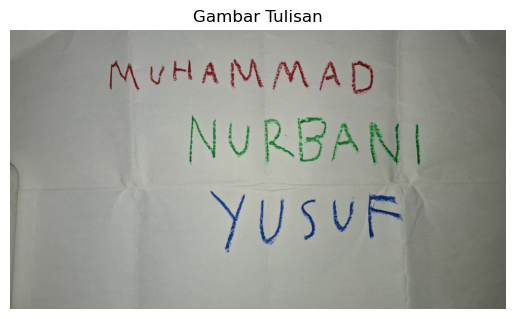

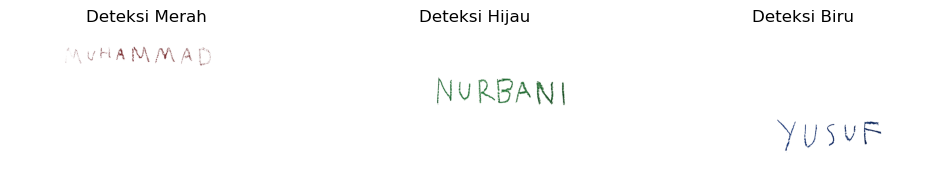

In [2]:
img = cv2.imread('gambartulisan.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])

lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def apply_mask_with_white_bg(img_rgb, mask):
    result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    white_bg = np.ones_like(img_rgb, dtype=np.uint8) * 255
    result_with_white = np.where(mask[:, :, None] == 0, white_bg, result)
    return result_with_white

red_result = apply_mask_with_white_bg(img_rgb, mask_red)
green_result = apply_mask_with_white_bg(img_rgb, mask_green)
blue_result = apply_mask_with_white_bg(img_rgb, mask_blue)

plt.imshow(img_rgb)
plt.title('Gambar Tulisan')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(red_result)
plt.title('Deteksi Merah')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_result)
plt.title('Deteksi Hijau')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_result)
plt.title('Deteksi Biru')
plt.axis('off')

plt.show()

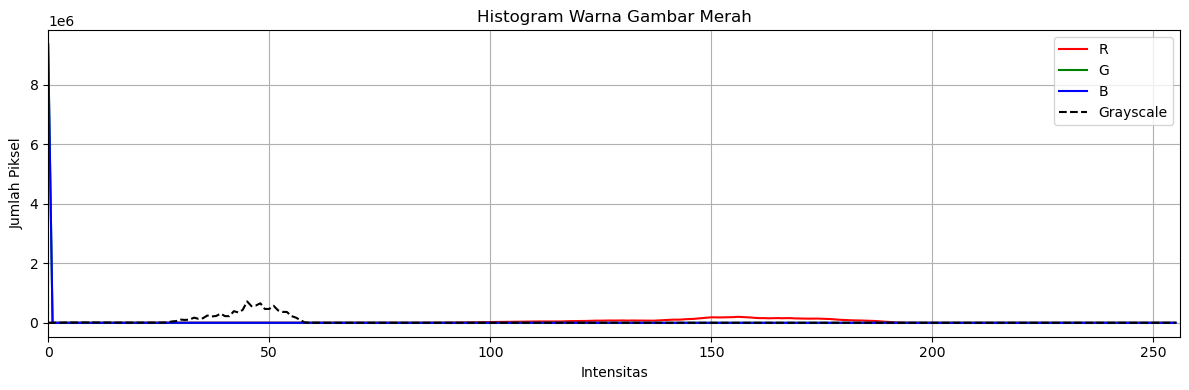

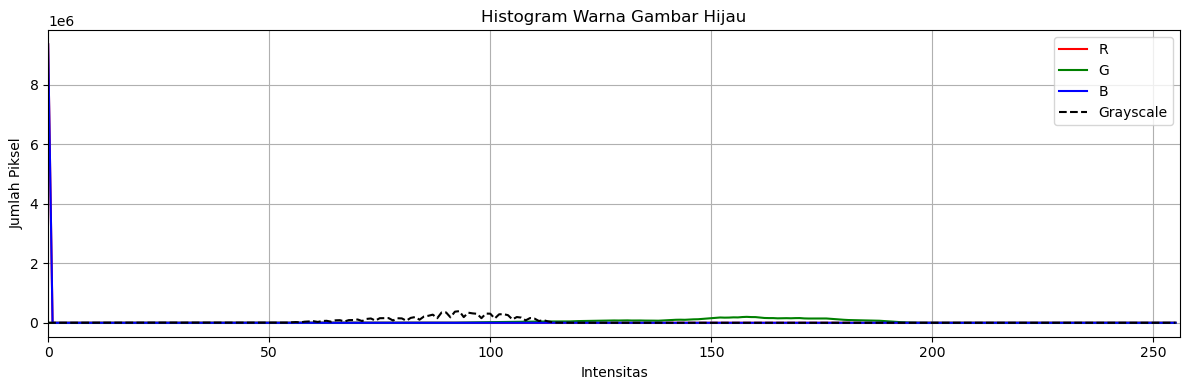

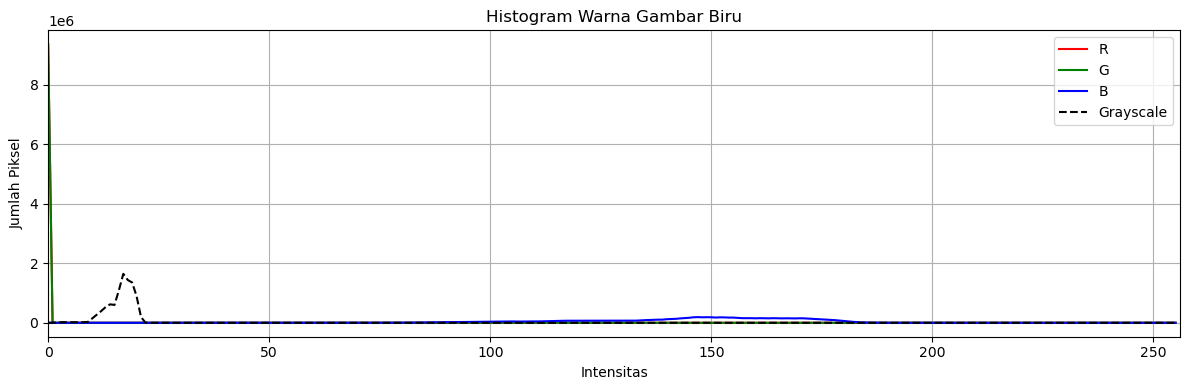

In [3]:
img = cv2.imread('gambartulisan.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(img)

img_red = cv2.merge([R, R*0, R*0])
img_green = cv2.merge([G*0, G, G*0])
img_blue = cv2.merge([B*0, B*0, B])

images = [img_red, img_green, img_blue]
labels = ['Merah', 'Hijau', 'Biru']

for idx, filtered_img in enumerate(images):
    plt.figure(figsize=(12, 4))

    
    colors = ['r', 'g', 'b']
    for i, col in enumerate(colors):
        hist = cv2.calcHist([filtered_img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    
    gray = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2GRAY)
    hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.plot(hist_gray, color='k', linestyle='--', label='Grayscale')

    plt.title(f'Histogram Warna Gambar {labels[idx]}')
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Piksel')
    plt.legend(['R', 'G', 'B', 'Grayscale'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

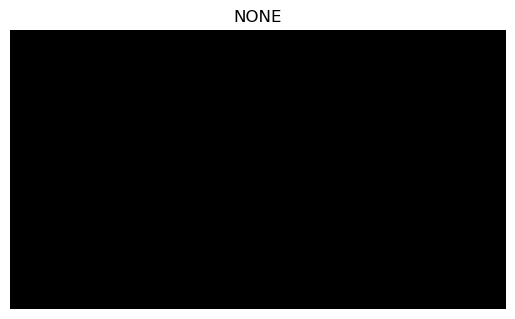

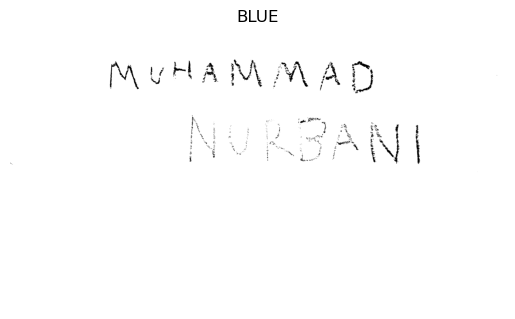

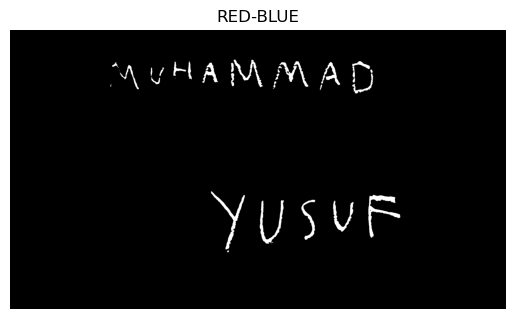

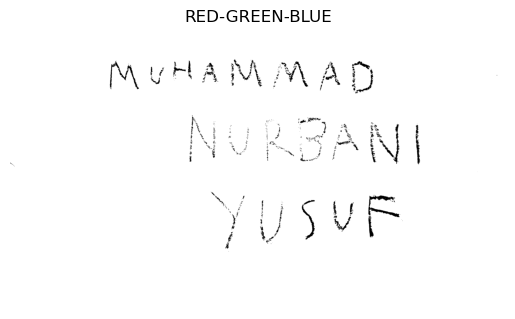

In [4]:
img = cv2.imread('gambartulisan.jpg')

b, g, r = cv2.split(img)

def show(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

_, none = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 255, 255, cv2.THRESH_BINARY)

_, thresh_b = cv2.threshold(b, 50, 255, cv2.THRESH_BINARY)
_, thresh_rb = cv2.threshold(cv2.absdiff(r, b), 50, 255, cv2.THRESH_BINARY)
_, thresh_rgb = cv2.threshold(cv2.add(cv2.add(r, g), b), 200, 255, cv2.THRESH_BINARY)

show("NONE", none)
show("BLUE", thresh_b)
show("RED-BLUE", thresh_rb)
show("RED-GREEN-BLUE", thresh_rgb)

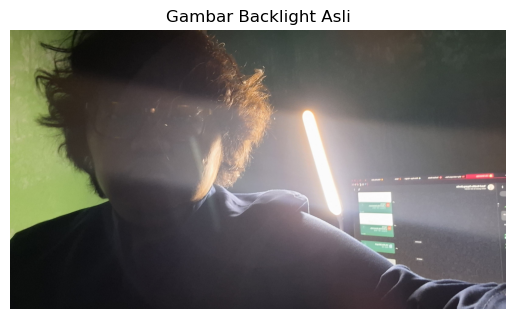

In [5]:
img_backlight = cv2.imread('gambarbacklight.jpg')
img_backlight_rgb = cv2.cvtColor(img_backlight, cv2.COLOR_BGR2RGB)

plt.imshow(img_backlight_rgb)
plt.title('Gambar Backlight Asli')
plt.axis('off')
plt.show()

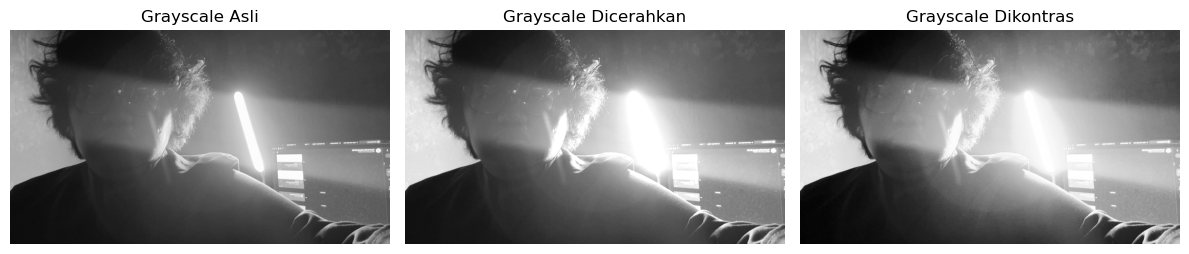

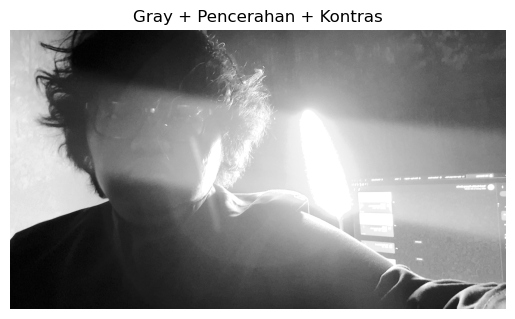

In [16]:
img = cv2.imread('gambarbacklight.jpg') 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bright = cv2.convertScaleAbs(gray, alpha=1, beta=60) 

contrast = cv2.equalizeHist(gray)

titles = ['Grayscale Asli', 'Grayscale Dicerahkan', 'Grayscale Dikontras']
images = [gray, bright, contrast]

contrast = cv2.equalizeHist(bright)

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.imshow(contrast, cmap='gray')
plt.title('Gray + Pencerahan + Kontras')
plt.axis('off')
plt.show()